# Visualisation using matplotlib

![Matplotlib](http://upload.wikimedia.org/wikipedia/en/5/56/Matplotlib_logo.svg)

# Notebook Setup (run me first!)

First, we apply a "magic command" to make plots appear "inline" inside the notebook

In [1]:
%matplotlib inline

In [2]:
import math
import os
from pathlib import Path
import random

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from IPython.display import HTML

# Make the size and fonts larger for this presentation
plt.rcParams['figure.figsize'] = (10, 6)
plt.rcParams['font.size'] = 16
plt.rcParams['lines.linewidth'] = 2

Set the path to the git repository, it will be used later on to fetch data

In [3]:
# if you cd'd to the repo folder before launching the jupyter lab server this should be fine
#path_to_the_repo = os.getcwd() 
# Otherwise you'll have to set it manually
path_to_the_repo = "/Users/julia/Desktop/Master Astro/Dades/Python Bootcamp/session_3_plotting"

# Auxiliary data: Spain power generation data 

Data from Red Eléctrica, retrieved from the public [REData API] (https://www.ree.es/es/apidatos).

Daily (raw) data 2014-2023 in kWh

In [4]:
daily_csv = os.path.join(path_to_the_repo, 'resources', 'power_sources_daily_2014_2023.csv')
df_daily = pd.read_csv(daily_csv, index_col=0)
df_daily.fillna(0, inplace=True)
df_daily.shape

(3652, 21)

In [5]:
df_daily.head(5)

,Hydro,PumpedStorage,Nuclear,Coal,FuelGas,DieselEngines,GasTurbine,SteamTurbine,CombinedCycle,Hydroeolian,...,SolarPhotovoltaic,ThermalSolar,OtherRenewables,Cogeneration,NonRenewableWaste,RenewableWaste,TotalGeneration,year,month,day
2014-01-01,73065.052,6970.160,146015.503,25240.655,-4.599,8388.976,1481.931,6117.065,53534.600,0.0,...,7631.801,519.532,11897.240,54043.077,4616.7525,1877.3425,659291.293,2014,1,1
2014-01-02,89171.545,23682.079,146147.546,37546.113,-4.825,8659.002,2325.496,7586.721,52322.227,0.0,...,3836.442,177.784,11564.649,79006.632,4743.0875,1831.7535,739360.656,2014,1,2
2014-01-03,102502.527,23882.275,146198.074,42672.054,-4.767,8734.932,2196.861,8043.085,51254.562,0.0,...,8673.179,1157.242,11891.476,85658.228,4657.5170,1599.8520,747939.175,2014,1,3
2014-01-04,106840.706,8520.894,146270.916,30782.043,-4.626,8427.393,1620.337,6875.346,32862.777,0.0,...,8813.196,478.934,12103.260,65312.961,4375.2160,1519.4580,749876.430,2014,1,4
2014-01-05,117217.635,17345.744,121525.188,24606.925,-4.795,8346.540,1564.459,6511.197,41422.898,0.0,...,10878.603,2137.221,11775.113,64800.182,4462.8175,1729.6255,694993.941,2014,1,5


Compute monthly aggregates in kwH

In [6]:
df_monthly = df_daily.groupby(['year', 'month'], as_index=False).sum().drop('day', axis=1)
df_monthly['date'] = pd.to_datetime(
    df_monthly['year'].astype(str) + '-' + df_monthly['month'].astype(str) + '-01'
)

In [7]:
df_monthly.head(5)

,year,month,Hydro,PumpedStorage,Nuclear,Coal,FuelGas,DieselEngines,GasTurbine,SteamTurbine,...,Hydroeolian,Wind,SolarPhotovoltaic,ThermalSolar,OtherRenewables,Cogeneration,NonRenewableWaste,RenewableWaste,TotalGeneration,date
0,2014,1,4261392.824,443678.644,4526062.779,2293159.522,-148.739,275357.985,54877.485,216697.507,...,0.0,6570961.682,377518.728,79800.655,380895.587,2550462.421,143220.5220,49339.6480,2.403327e+07,2014-01-01
1,2014,2,5763251.167,369221.991,4721937.495,884091.427,-134.753,253341.742,57405.486,176742.116,...,0.0,5917525.957,434383.400,103264.502,293997.433,1876056.059,122564.6445,35868.0395,2.253211e+07,2014-02-01
2,2014,3,5293018.012,354775.253,5286792.276,1294242.753,-140.900,255615.002,62648.045,150180.230,...,0.0,5096447.600,735970.624,385175.316,305878.249,1831179.497,112142.4080,32435.4660,2.279159e+07,2014-03-01
3,2014,4,4986856.873,361188.617,5056306.647,1385564.216,-107.327,239877.290,65461.729,152334.800,...,0.0,3978164.753,791985.906,435527.059,266467.509,1618663.435,137938.5380,51170.3200,2.103158e+07,2014-04-01
4,2014,5,2826765.233,275956.466,4336633.309,3367749.593,-109.851,257606.270,71625.317,145996.242,...,0.0,4177875.518,924515.196,729935.555,330192.006,1931174.991,162033.5560,60551.0040,2.131005e+07,2014-05-01


Identify renewable vs non-renewable sources

In [8]:
renewable = [
    'Hydro',
    'Hydroeolian',
    'Wind',
    'SolarPhotovoltaic',
    'ThermalSolar',
    'OtherRenewables',
    'RenewableWaste'
]
non_renewable = [
    'PumpedStorage',
    'Nuclear',
    'Coal',
    'FuelGas',
    'DieselEngines',
    'GasTurbine',
    'SteamTurbine',
    'CombinedCycle',
    'Cogeneration',
    'NonRenewableWaste'
]

# Introduction: Why Matplotlib?

When starting out with data visualization in Python, you'll encounter many libraries: **Matplotlib, Seaborn, Plotly, Bokeh**, and more. Why start with Matplotlib?

* **It's the Foundation**: Most other Python plotting libraries, including Seaborn and Pandas' built-in plotting, are built on top of Matplotlib. Understanding its core concepts gives you full control and allows you to customize any plot from these higher-level libraries.

* **Deep Integration with Python & NumPy**: Matplotlib is built to work with native Python data structures, NumPy arrays and Pandas DataFrames. Its plotting functions are optimized to handle array-like objects efficiently, making it the de facto standard for visualizing numerical data from scientific computing and data analysis workflows.

* **Low-Level Control**: Matplotlib provides granular, object-oriented control over every element of a plot. This is a double-edged sword: it can be more verbose for simple plots, but it's essential for creating highly customized, publication-quality figures.

* **Versatility**: Matplotlib can create a vast range of static plots, from simple line plots to complex 3D visualizations, histograms, and contour plots.

It also has some downsides:

* **Steep Learning Curve and Verbose Syntax**: Matplotlib often requires multiple lines of code to achieve a simple plot, compared to higher-level libraries like Seaborn or Plotly.

* **Old-school plotting library**. Matplotlib's default plot styles are less visually appealing than those of more modern libraries like Seaborn. Matplotlib is primarily a static plotting library. While it can be made interactive with additional backends, it lacks the native, out-of-the-box interactive features that libraries like Plotly and Bokeh offer, such as zooming, panning, and hovering over data points to see details.

* **Not Optimized for Statistical Plots and DataFrames** Matplotlib does not have the same built-in functionality for specialized statistical visualizations as Seaborn. While Matplotlib can work with Pandas DataFrames, it may require more data manipulation to create certain plots.

# Examples
## Simple example

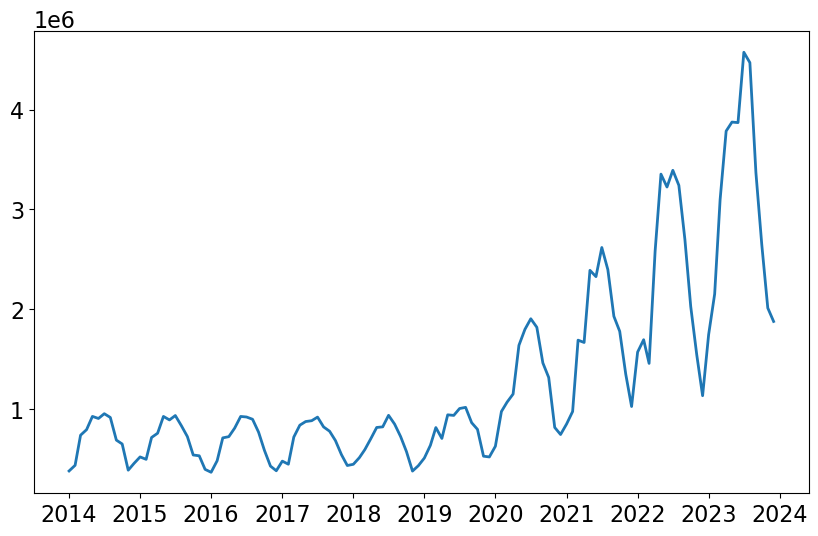

In [9]:
from matplotlib import pyplot as plt
plt.plot(
    df_monthly.date, # X axis
    df_monthly['SolarPhotovoltaic'] # Y axis
)

Although matplotlib is low level, it's already automating part of the work:
* scientific notation in y-axis
* year labels in the x-axis

## Full example

<img src="resources/matplotlib_figure_anatomy.png" width="50%"></img>

Text(0.5, 1.0, 'Energy production by source 2013-2024')

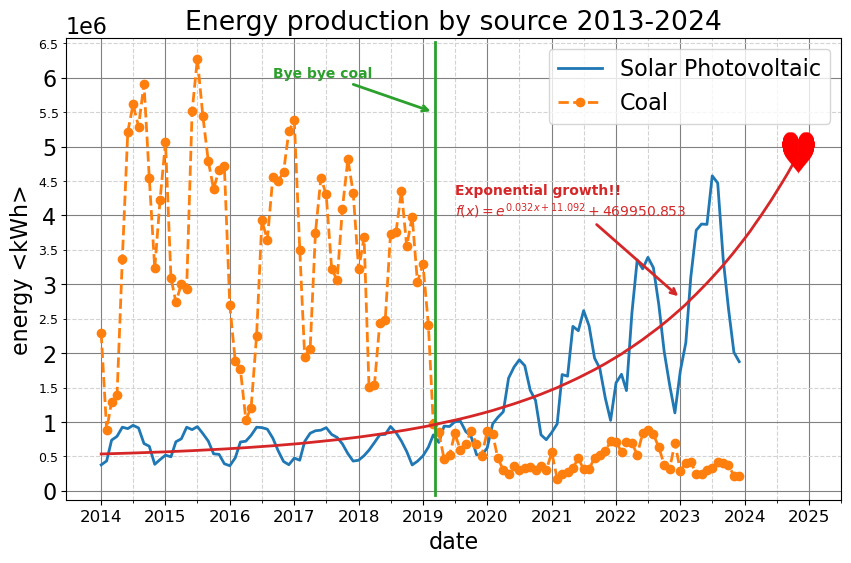

In [10]:
from scipy.optimize import curve_fit
import matplotlib.dates as mdates
import matplotlib.image as mpimg
import matplotlib.pyplot as plt

# Load the PNG file as a NumPy array
img = mpimg.imread('resources/heart.png')

plt.plot(
    df_monthly.date, df_monthly['SolarPhotovoltaic'],
    color='tab:blue', label='Solar Photovoltaic'
)

plt.plot(
    df_monthly.date, df_monthly['Coal'], color='tab:orange',
    linestyle='--', marker='o', label='Coal'
)

# Annotate coal production drop
plt.axvline(np.datetime64('2019-03-13'), ymin=0.01, ymax=0.99, color='tab:green')
plt.annotate(
    'Bye bye coal', [np.datetime64('2019-03-01'), 5.5e6],
    xytext=[np.datetime64('2016-09-01'), 6e6], arrowprops={'arrowstyle':'->', 'color': 'tab:green', 'linewidth': 2},
    color='tab:green', fontweight='bold', fontsize=10
)

# Fitting an exponential to the photovoltaic production
def f(x, a, b, c):
    return np.exp(a*x + b) + c
y = df_monthly['SolarPhotovoltaic']
x = np.arange(len(y))
params, covariance_matrix = curve_fit(f, x, y)

xi = np.arange(len(y) + 12)
yi = df_monthly.date.tolist()
yi += [np.datetime64(f'{y}-{m:02.0f}-01') for y in (2024,) for m in range(1, 13) ]
plt.plot(yi, f(xi, *params), color='tab:red')

plt.annotate(
    'Exponential growth!!\n$f(x)=e^{{{0:.3f}x+{1:.3f}}} + {2:.3f}$'.format(*params),
    [np.datetime64('2023-01-01'), 2.8e6],
    xytext=[np.datetime64('2019-07-01'), 4e6], arrowprops={'arrowstyle':'->', 'color': 'tab:red', 'linewidth': 2},
    color='tab:red', fontsize=10, fontweight='bold'
)
ax = plt.gca()
current_xlim = ax.get_xlim()
current_ylim = ax.get_ylim()
plt.imshow(
    img, extent=[
        mdates.date2num(np.datetime64('2024-08-01')),
        mdates.date2num(np.datetime64('2025-02-01')), 4.6e6, 5.2e6],
    aspect='auto',
    zorder=40
)
ax.set_xlim(current_xlim)
ax.set_ylim(current_ylim)

# Ticks and grid
plt.yticks(np.arange(7)*1e6, minor=False)
plt.yticks((np.arange(7) + 0.5)*1e6, labels=[f'{s + 0.5:.1f}' for s in range(7)], minor=True, fontsize=9)
plt.xticks(np.arange('2014', '2026', dtype='datetime64[Y]'), minor=False, fontsize=12)
ax = plt.gca()
year_formatter = mdates.DateFormatter('%Y')
ax.xaxis.set_major_formatter(year_formatter)
plt.xticks([np.datetime64(f'{i}-07-01')for i in range(2014, 2026)], minor=True)
plt.grid(which='major', color='grey', linestyle='-')
plt.grid(which='minor', color='lightgrey', linestyle='--')

# Labels and legend
plt.xlabel('date')
plt.ylabel('energy <kWh>')
plt.legend()
plt.title('Energy production by source 2013-2024')

## Other kinds of plots

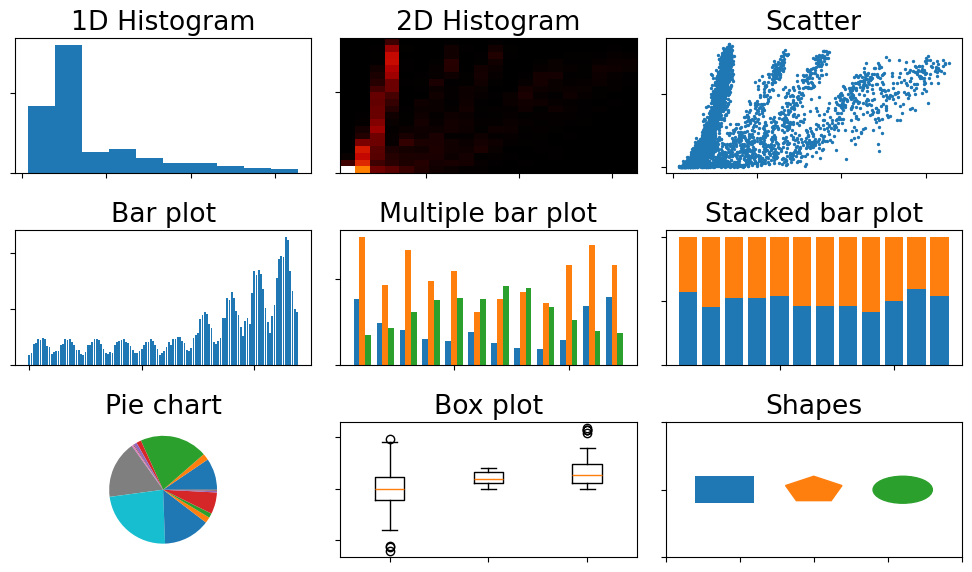

In [11]:
from matplotlib.patches import Circle, Ellipse, Rectangle, Polygon, RegularPolygon
from matplotlib.collections import PatchCollection

fig, ax_list = plt.subplots(3, 3)

ax = ax_list[0, 0]
phot_counts, phot_bins, _ = ax.hist(df_daily['SolarPhotovoltaic']/1e3)
ax.set_title('1D Histogram')

ax = ax_list[0, 1]
hist_output = ax.hist2d(df_daily['SolarPhotovoltaic'], df_daily['ThermalSolar'], bins=20, cmap='gist_heat')
ax.set_title('2D Histogram')

ax = ax_list[0, 2]
hist_output = ax.scatter(df_daily['SolarPhotovoltaic'], df_daily['ThermalSolar'], s=2)
ax.set_title('Scatter')

ax = ax_list[1, 0]
ax.bar(range(len(df_monthly['SolarPhotovoltaic'])), df_monthly['SolarPhotovoltaic'])
ax.set_title('Bar plot')

ax = ax_list[1, 1]
year = 2023
year_mask = df_monthly.year == year
sources_list = ['Hydro', 'Wind', 'SolarPhotovoltaic']
n_sources = len(sources_list)
for ind, source in enumerate(sources_list):
    ax.bar(np.arange(1, 13) + (ind - 1)/(n_sources + 1),
            df_monthly[year_mask][source]/1000,
            width=1/(n_sources + 1),
            label=source)
ax.set_title('Multiple bar plot')


ax = ax_list[1, 2]
total_df = df_monthly.loc[year_mask, renewable + non_renewable].sum(axis=1)
renewable_df = 100*df_monthly.loc[year_mask, renewable].sum(axis=1)/total_df
non_renewable_df = 100*df_monthly.loc[year_mask, non_renewable].sum(axis=1)/total_df
ax.bar(range(1, 13), renewable_df, label='Renewable')
ax.bar(range(1, 13), non_renewable_df, bottom=renewable_df, label='Non renewable')
ax.set_title('Stacked bar plot')


ax = ax_list[2, 0]
dropped_columns = ['year', 'month', 'TotalGeneration', 'date']
totals_year = (df_monthly.drop( dropped_columns, axis=1)[year_mask].sum()/1000)
totals_year = totals_year[totals_year > 0]
ax.pie(totals_year)
ax.set_title('Pie chart')

ax = ax_list[2, 1]
s1 = np.random.normal(size=100)
s2 = np.random.uniform(size=100)
s3 = np.random.exponential(size=100)
ax.boxplot([s1, s2, s3]);
ax.set_title('Box plot')

ax = ax_list[2, 2]
ax.add_patch(Rectangle((1, 4), 2, 2))
ax.add_patch(RegularPolygon((5, 5), 5, radius=1, color='C1'))
ax.add_patch(Circle((8, 5), 1, color='C2'))
ax.set_title('Shapes')
ax.set_xlim(0, 10)
ax.set_ylim(0, 10)

for ax in ax_list.flatten():
    ax.set_yticklabels([])
    ax.set_xticklabels([])

plt.tight_layout()




<a id=architecture></a>
# matplotlib architecture

In the first plots we used the implicit *pyplot* interface. It's a MATLAB-like interface that provides convenient methods for easy plotting. But it has some drawbacks:

* It's not very pythonic (python is OO)
* No idea what's happening in the background

This interface is OK for online plotting, because it's simple, but it is not convenient for other purposes, like embedding plots into a program. For all other purposes, the OO interface should be preferred. Using it, our code will be more verbose, but also more explanatory, and we'll have more control on what it's doing.


In order to introduce the OO API, it's convenient that we have some knowledge of matplotlib's architecture.

To achieve the manipulation and rendering of this objects, matplotlib is structured in three layers:
* *Scripting Layer (pyplot)*: Light scripting interface we have alredy shown
* *Artist Layer*: Are the things that have to be plotted. The figure, lines, axis, bars, ...
* *Backend*: It's the one that actually draws the Artists on the canvas.

## Artists layer

The top-level matplotlib object that contains and manages all of the elements in a given graphic is called the **Figure**.

Everything you see in a plot is an Artist instance. This layer is a hierarchy of objects with the **Figure** sitting on top of it.

<table><tr>
<td><img src="resources/artists_figure.png"></img></td>
<td><img src="resources/artists_tree.png"></img></td>
</tr>
</table>


Some more detail ([directly from the matplotlib documentation](https://matplotlib.org/tutorials/introductory/usage.html#parts-of-a-figure))

### Figure
The whole figure. The figure keeps track of all the child Axes, a smattering of 'special' artists (titles, figure legends, etc), and the canvas. A figure can have any number of Axes.

### Axes
This is what you think of as 'a plot', it is the region of the image with the data space. A given figure can contain many Axes, but a given Axes object can only be in one Figure. The Axes contains two (or three in the case of 3D) Axis objects.

The Axes class and it's member functions are the primary entry point to working with the OO interface.

### Axis
These are the number-line-like objects. They take care of setting the graph limits and generating the ticks (the marks on the axis) and ticklabels (strings labeling the ticks).

## The Object Oriented API

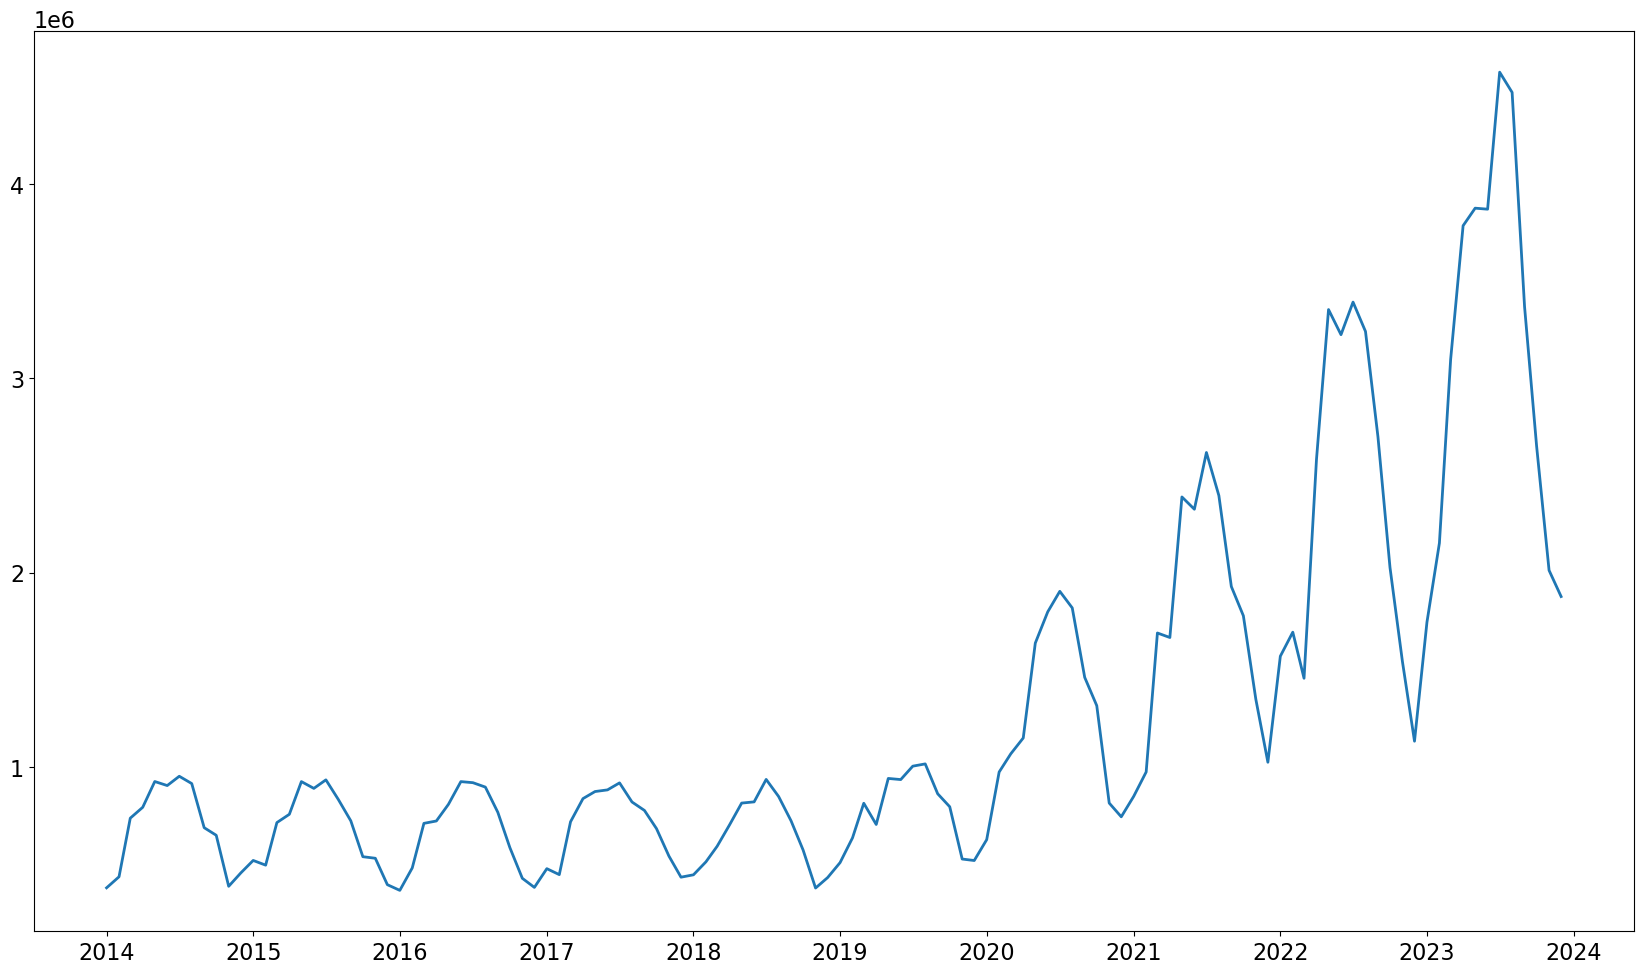

In [12]:
fig = plt.figure(figsize=(16, 9))
ax = fig.add_axes([0, 0, 1, 1])
ax.plot(df_monthly.date, df_monthly['SolarPhotovoltaic'])

Both APIs can be connected through the `pyplot.gcf` and `pyplot.gca` methods.

Is this the same? True



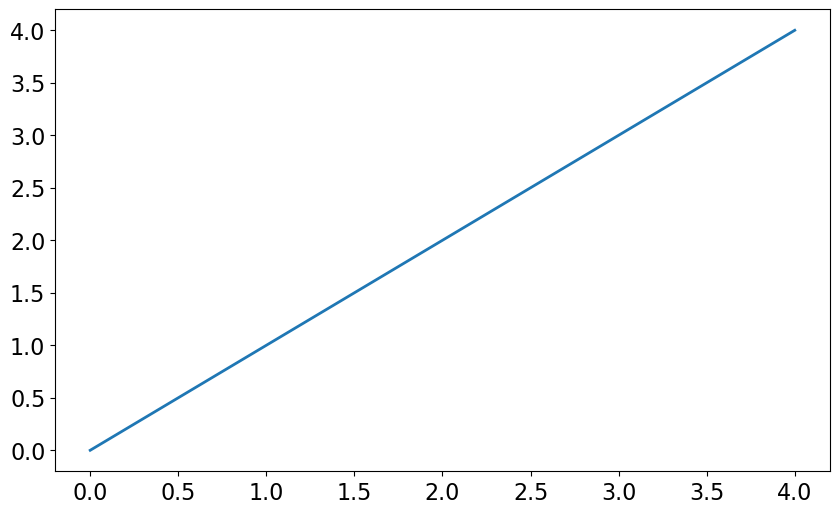

In [13]:
x = np.arange(5)
plt.plot(x, x)

fig = plt.gcf()
ax = plt.gca()
print('Is this the same? {}\n'.format(ax == fig.get_children()[1]))

## Backend

A Matplotlib backend is the drawing engine that translates Python code into a plot. It's the layer that takes the abstract plot objects created by Matplotlib's scripting and artist layers and renders them to a specific output, like a screen, a file (e.g., PDF, PNG), or a Jupyter notebook. Different backends exist for different purposes; some are designed for interactive use in a graphical user interface (GUI) or a notebook, while others are optimized for generating high-quality image files.

In [14]:
plt.get_backend()

'inline'

When using the inline backend, the current figure is renderd in cell execution.

New cells will contain new figures.

This behaviour may be different with other backends.

<a id=multiple_plots></a>
# Multiple plots in the same figure

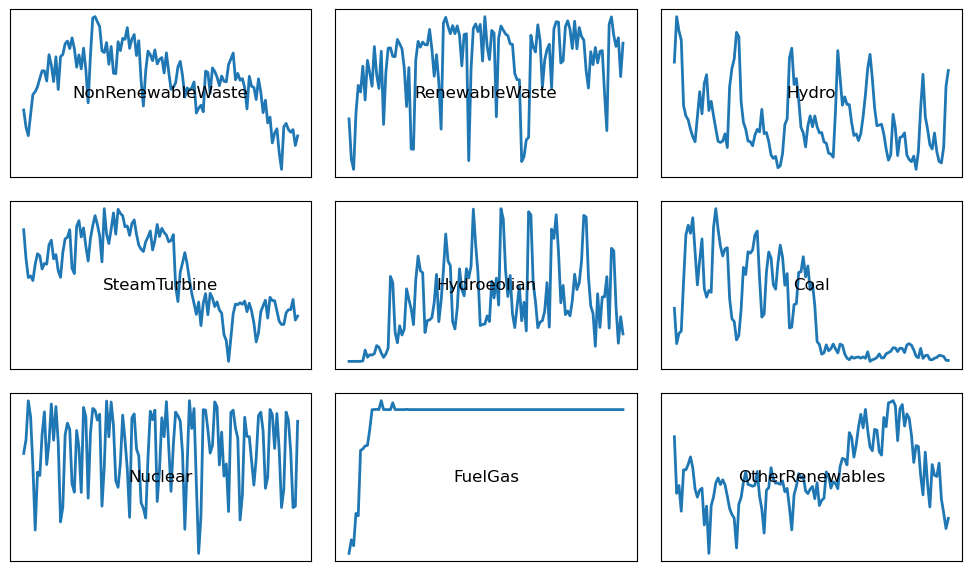

In [15]:
sources_sample = random.sample(renewable + non_renewable, 9)

fig = plt.figure()
for i in range(9):
    ax = fig.add_subplot(3, 3, i + 1)
    x = df_monthly[sources_sample[i]]
    ax.plot(x)
    x_center = np.array(ax.get_xlim()).sum()/2
    y_center = np.array(ax.get_ylim()).sum()/2.
    ax.text(x_center, y_center, sources_sample[i], ha='center', va='center', fontsize=12)

    # Remove the ticks for cleaner plotting
    ax.set_xticks([])
    ax.set_yticks([])

plt.tight_layout() # When doing multiple plots you should almost always use this command

# Additional concepts

## Projections

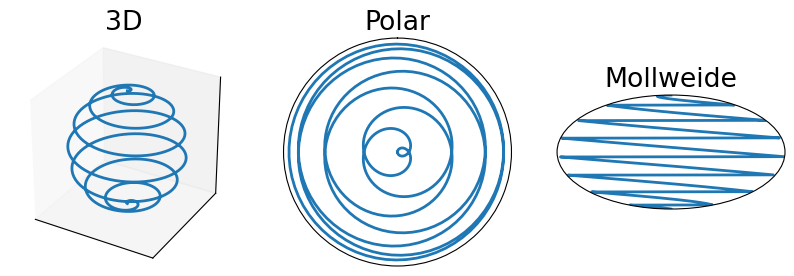

In [16]:
import numpy as np
import matplotlib.pyplot as plt

# Set up the 3D plot
fig = plt.figure(figsize=(10, 10))

# Define the parameters
R = 10  # Radius of the sphere
c = 15  # Constant for the spiral's tightness
t = np.linspace(0, np.pi, 500) # Parameter t from 0 to pi

# Calculate the x, y, z coordinates of the spiral
x = R * np.sin(t) * np.cos(c * t)
y = R * np.sin(t) * np.sin(c * t)
z = R * np.cos(t)

# Plot the spiral in 3D
ax1 = fig.add_subplot(131, projection='3d')
ax1.set_title('3D')
ax1.plot(x, y, z) # cartesian coords
ax1.set_xticks([])
ax1.set_yticks([])
ax1.set_zticks([])
ax1.set_box_aspect([1, 1, 1])

# Polar projection
ax2 = fig.add_subplot(132, projection='polar')
ax2.set_title('Polar')
ax2.plot(c*t, np.sin(t)) # angle, radius
ax2.set_xticks([])
ax2.set_yticks([])
ax2.set_theta_zero_location('N') # Set 0 degrees to the North (top)
ax2.set_theta_direction(-1) # Clockwise direction
ax2.grid(True)

# Mollweide
ax3 = fig.add_subplot(133, projection='mollweide')
ax3.set_title('Mollweide')
ax3.plot(np.mod(c*t, 2*np.pi) - np.pi, np.pi/2 - t)
ax3.set_xticks([])
ax3.set_yticks([]);


## Colormaps

Is essentially a function that maps values to colors

https://matplotlib.org/stable/gallery/color/colormap_reference.html

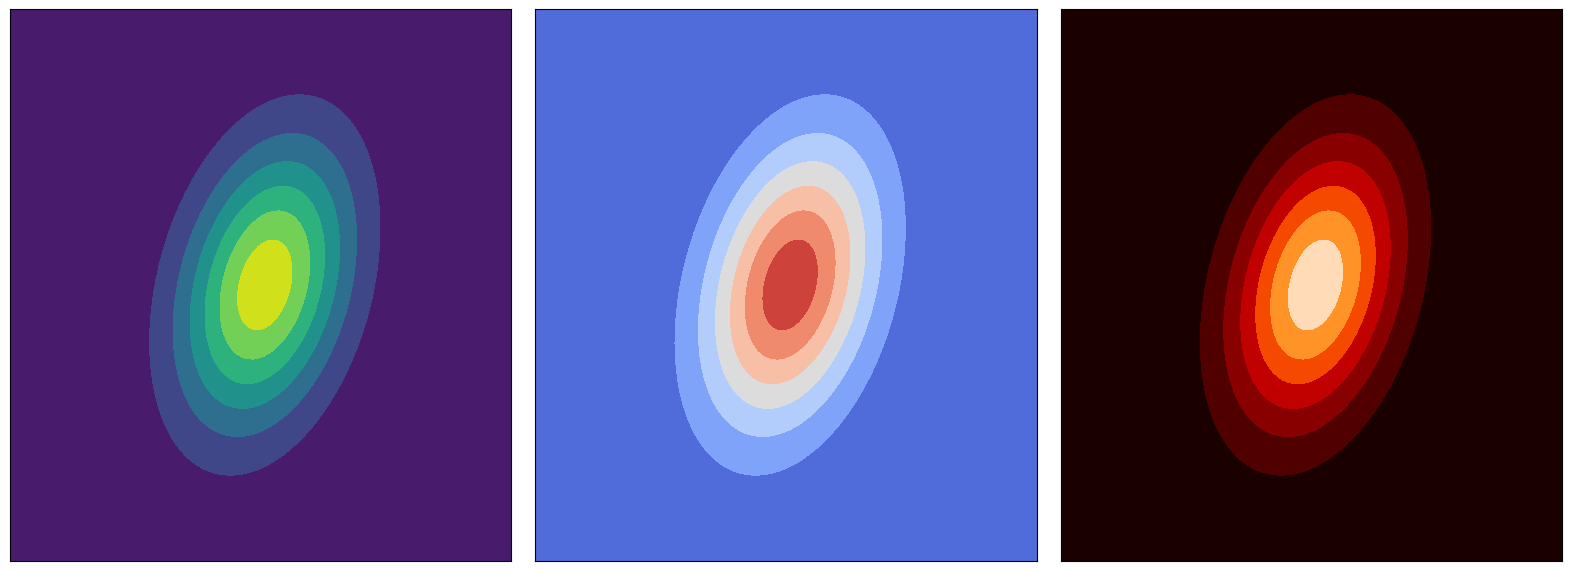

In [17]:
# Initialize a multivariate normal distribution
from scipy import stats
mult_mean = [0.1, 2.]
mult_cov =  [[2.0, 0.3], [0.3, 0.5]]
mult_norm = stats.multivariate_normal(mean=mult_mean, cov=mult_cov)

XLIM = [-6., 6.]
YLIM = [0., 4.]

fig, axes = plt.subplots(1, 3, figsize=(16., 6.))

# Make data.
x = np.linspace(*XLIM, 100)
y = np.linspace(*YLIM, 100)
X, Y = np.meshgrid(x, y)
pos = np.dstack((X, Y))
Z = mult_norm.pdf(pos)

# Contour plot of the PDF
cmaps = ['viridis', 'coolwarm', 'gist_heat']
for ax, cmap in zip(axes, cmaps):
    ax.contourf(X, Y, Z, cmap=cmap)
    ax.set_xticks([])
    ax.set_yticks([])
    
plt.tight_layout()

<a id=plot_styles></a>
## Plot styles

List available styles:

In [18]:
print(plt.style.available)

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'petroff10', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']


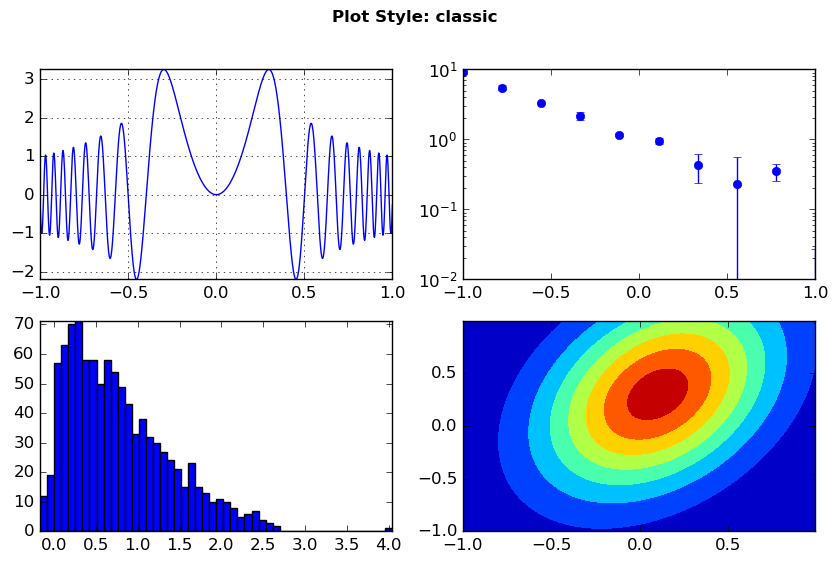

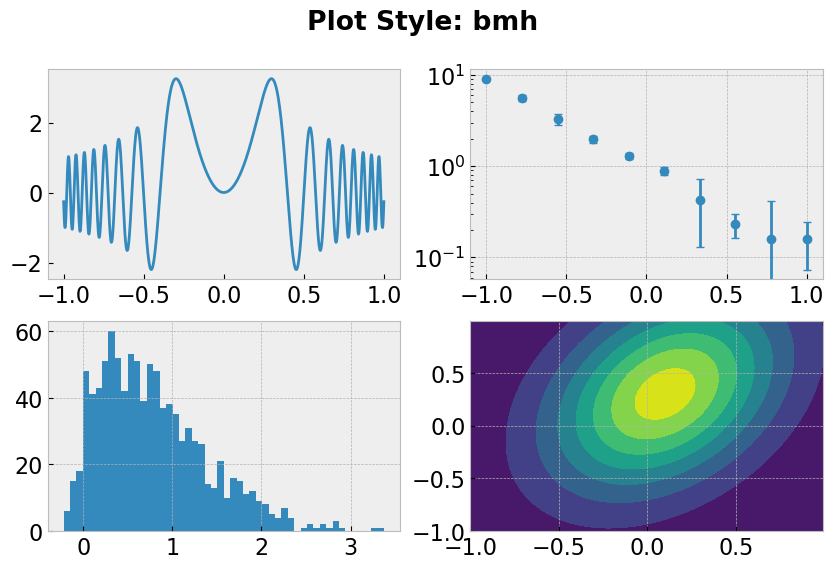

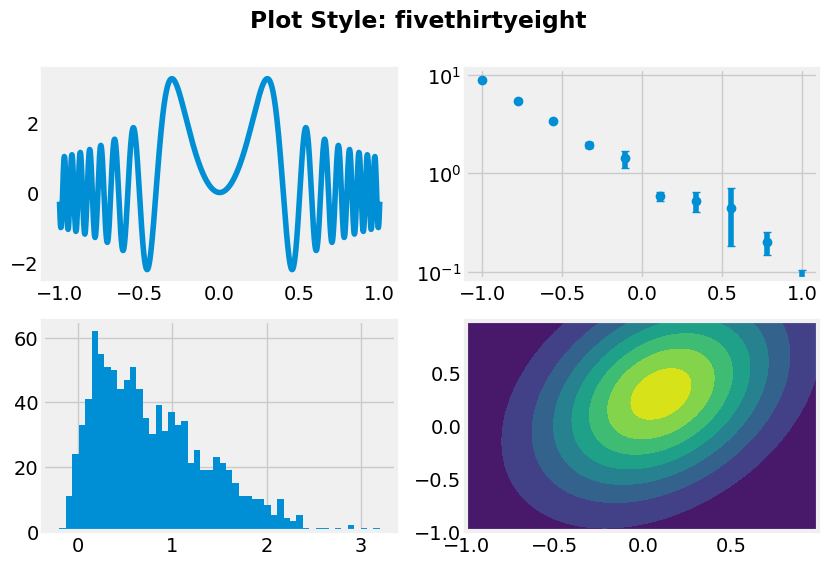

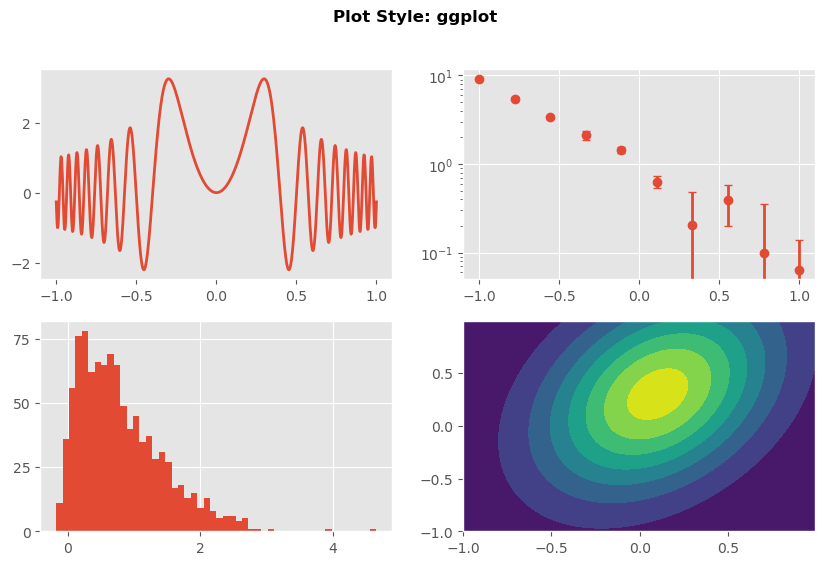

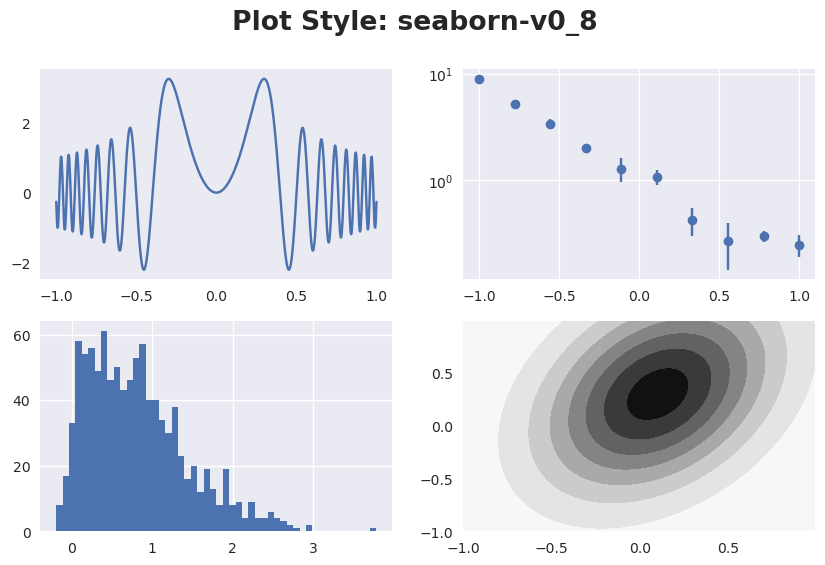

In [19]:
from scipy import stats

def plot_stuff():
    plt.subplot(2, 2, 1)
    x = np.linspace(-1, 1, 1000)
    plt.plot(x, np.sin(50*x**3)/(x))
    plt.grid()

    plt.subplot(2, 2, 2)
    x = np.linspace(-1, 1, 10)
    y = np.exp(-2.2*x) + np.random.normal(0, 0.1, 10)
    yerr = np.abs(np.random.normal(0, 0.2, 10))
    plt.errorbar(x, y, yerr, fmt='o', capsize=3)
    plt.yscale('log')

    plt.subplot(2, 2, 3)
    x = stats.skewnorm.rvs(10, size=1000)
    plt.hist(x, bins=50)

    plt.subplot(2, 2, 4)
    x, y = np.mgrid[-1:1:.01, -1:1:.01]
    pos = np.dstack((x, y))
    z = stats.multivariate_normal([0.1, 0.3], [[0.2, 0.3], [0.1, 0.4]])
    plt.contourf(x, y, z.pdf(pos))

for plot_style in ['classic', 'bmh', 'fivethirtyeight', 'ggplot', 'seaborn-v0_8']:
    plt.figure()
    with plt.style.context(plot_style):   # use context manager so that changes are temporary
        plot_stuff()
        plt.suptitle('Plot Style: ' + plot_style, fontweight='bold')

<a id=save_figures></a>
## Saving figures

Use `plt.savefig` to save your figure.

You can either give path relative to your working directory or an absolute path.
Not sure what the current working directory is?

In [20]:
pwd()

'/Users/julia/Desktop/Master Astro/Dades/Python Bootcamp/session_3_plotting'

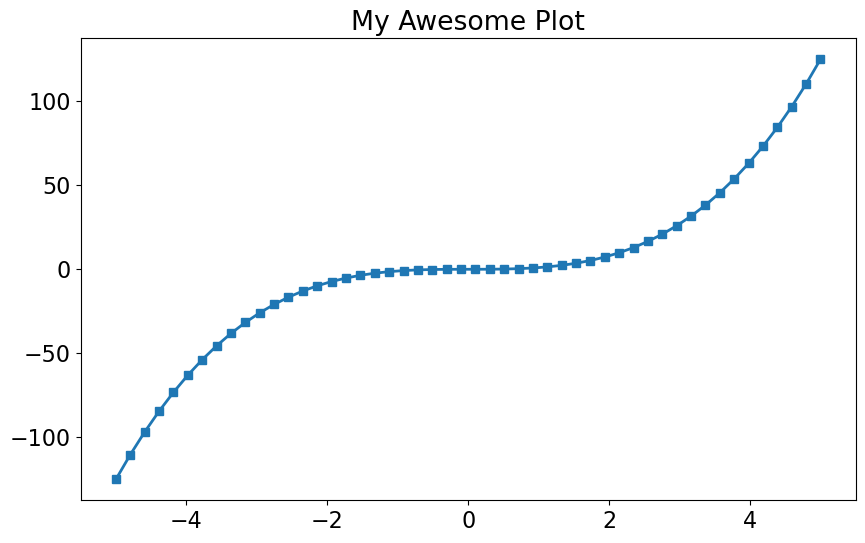

In [21]:
x = np.linspace(-5, 5)
plt.plot(x, x**3, marker='s')
plt.title("My Awesome Plot")
plot_folder = Path('plots')
plot_folder.mkdir(exist_ok=True)

# save in dedicated directory; extension determines file type
plt.savefig(plot_folder / 'awesome_plot.pdf')
plt.savefig(plot_folder / 'awesome_plot.eps')
plt.savefig(plot_folder / 'awesome_plot.png', dpi=300)
plt.savefig(plot_folder / 'awesome_plot.jpg', dpi=300)

# absolute path
# plt.savefig('/path/to/output/directory/awesome_plot.pdf')

## Interactive plotting with ipympl

By changing the backend ( %matplotlib inline -> %matplotlib ipympl ) . We will already have interactive exploration for free.

Change the backend, restart the notebook and regenerate any of the previous plots

The data in the plots can be dynamically updated.

You may have to install `ipympl` if it is not already installed

In [22]:
# To install ipympl uncomment the following line and run the cell
#!pip install ipympl

In [23]:
%matplotlib widget

In [24]:
import matplotlib.pyplot as plt
import numpy as np
from ipywidgets import AppLayout, FloatSlider

plt.ioff()

slider = FloatSlider(
    orientation='horizontal',
    description='Factor:',
    value=1.0,
    min=0.02,
    max=2.0
)

slider.layout.margin = '0px 30% 0px 30%'
slider.layout.width = '40%'

fig = plt.figure()
fig.canvas.header_visible = False
fig.canvas.layout.min_height = '400px'
plt.title('Plotting: y=sin({} * x)'.format(slider.value))

x = np.linspace(0, 20, 500)

lines = plt.plot(x, np.sin(slider.value * x))

def update_lines(change):
    plt.title('Plotting: y=sin({} * x)'.format(change.new))
    lines[0].set_data(x, np.sin(change.new * x))
    fig.canvas.draw()
    fig.canvas.flush_events()

slider.observe(update_lines, names='value')

AppLayout(
    center=fig.canvas,
    footer=slider,
    pane_heights=[0, 6, 1]
)

AppLayout(children=(FloatSlider(value=1.0, description='Factor:', layout=Layout(grid_area='footer', margin='0p…

# Alternative plotting libraries

## Seaborn

Big set of predefined statistical plots

In [25]:
import seaborn as sns

g = sns.PairGrid(df_daily[['Wind', 'SolarPhotovoltaic', 'Nuclear', 'Coal']],
                 diag_sharey=False)
g.map_upper(sns.histplot)
g.map_lower(sns.kdeplot)
g.map_diag(sns.histplot)
g.tick_params(labelsize=8, labelrotation=45)

And much more ... https://seaborn.pydata.org/

## pandas

Pandas has a number of built-in plotting methods that are very convenient when working with dataframes

In [26]:
year_mask = df_monthly.year == 2023
sel_cols = ['Wind', 'SolarPhotovoltaic', 'Nuclear', 'month']
df_monthly[year_mask][sel_cols].plot.bar(x='month')

<Axes: xlabel='month'>

## Bokeh 

Python library to produce interactive plots

https://docs.bokeh.org/en/latest/index.html

To be able to use it in a notebook you may have to install jupyter_bokeh and restart

In [27]:
!pip install jupyter_bokeh

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.2/7.2 MB 5.6 MB/s  0:00:01 eta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6/6 [jupyter_bokeh]0m [bokeh]ls]


In [28]:
import numpy as np
from bokeh.io import push_notebook, show, output_notebook
from bokeh.models import HoverTool
from bokeh.plotting import figure 
output_notebook()

Loading BokehJS ...

In [29]:
N = 4000
x = np.random.random(size=N) * 100
y = np.random.random(size=N) * 100
radii = np.random.random(size=N) * 5
colors = np.array([(r, g, 150) for r, g in zip(50+2*x, 30+2*y)], dtype="uint8")

p = figure()

r1 = p.scatter(x, y, size=radii, color=colors)

show(p, notebook_handle=True)

## plotly

https://plotly.com/python/

In [30]:
import plotly.express as px
df = px.data.iris()
fig = px.scatter(df, x="sepal_width", y="sepal_length", color='petal_length')
fig.show()

ModuleNotFoundError: No module named 'plotly'